# Dropout Regularization


 Let's say you train a neural network like the one on the left and there's over-fitting. Here's what you do with dropout. Let me make a copy of the neural network. With dropout, what we're going to do is go through each of the layers of the network and set some probability of eliminating a node in neural network. Let's say that for each of these layers, we're going to- for each node, toss a coin and have a 0.5 chance of keeping each node and 0.5 chance of removing each node. So, after the coin tosses, maybe we'll decide to eliminate those nodes, then what you do is actually remove all the outgoing things from that no as well. 

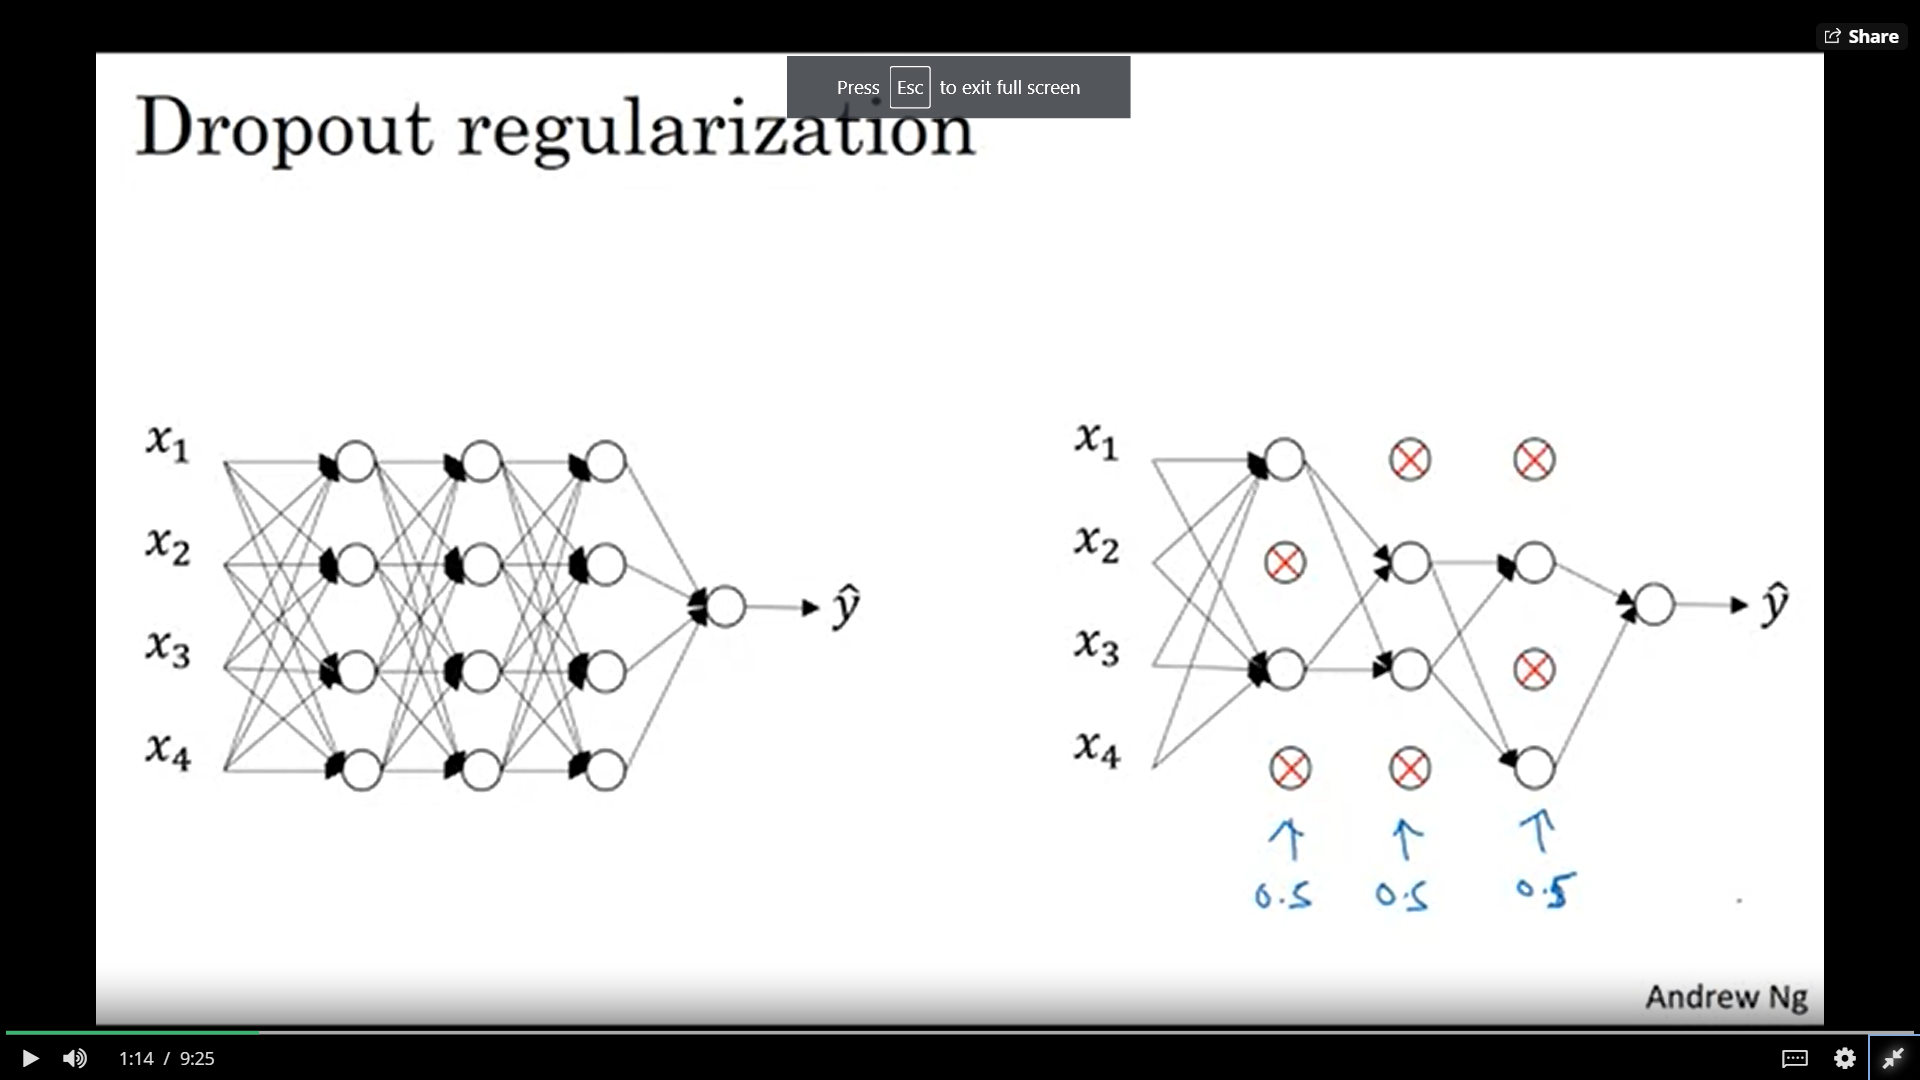

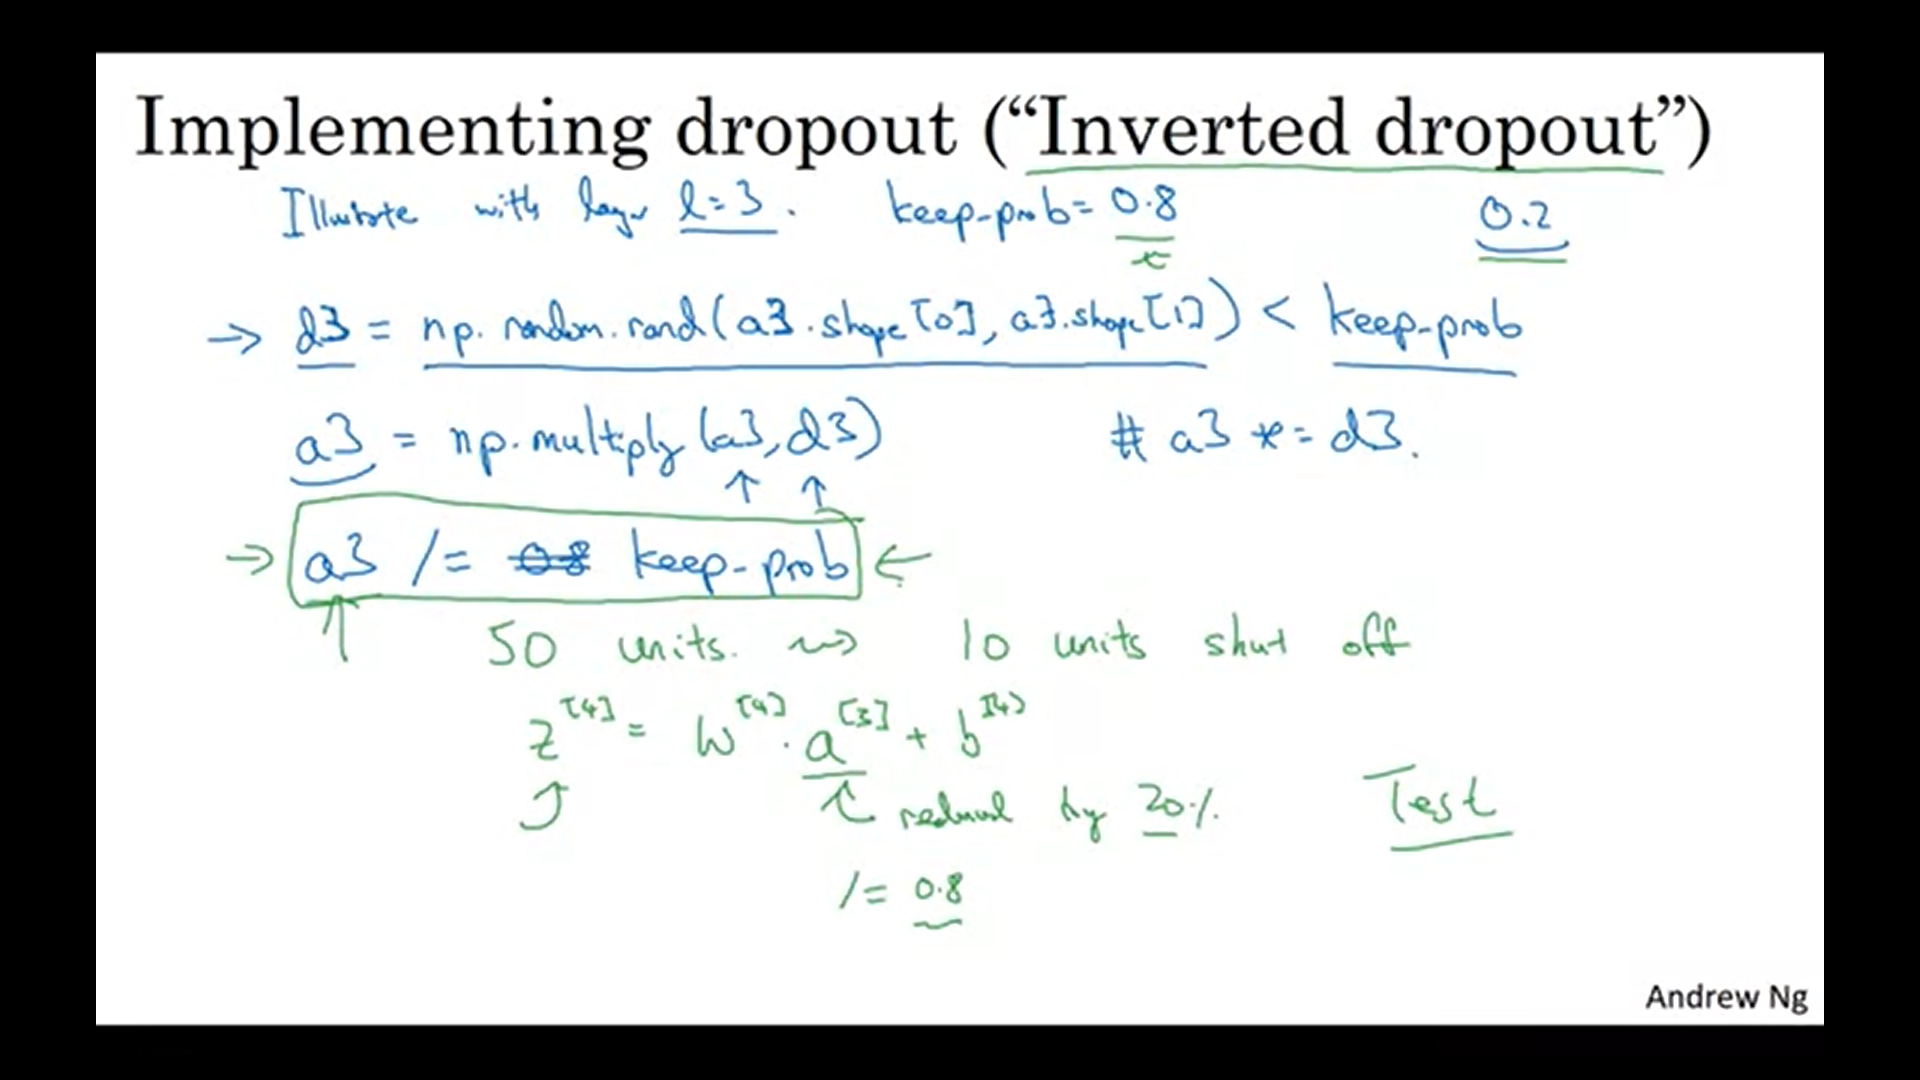

So, what we are going to do is set a vector d and d^3 is going to be the dropout vector for the layer 3. That's what the 3 is to be np.random.rand(a). And this is going to be the same shape as a3. And when I see if this is less than some number, which I'm going to call keep.prob. And so, keep.prob is a number. It was 0.5 on the previous time, and maybe now I'll use 0.8 in this example, and there will be the probability that a given hidden unit will be kept. So keep.prob = 0.8, then this means that there's a 0.2 chance of eliminating any hidden unit. So, what it does is it generates a random matrix. And this works as well if you have factorized. So d3 will be a matrix. Therefore, each example have a each hidden unit there's a 0.8 chance that the corresponding d3 will be one, and a 20% chance there will be zero.

If you do this in python, technically d3 will be a boolean array where value is true and false, rather than one and zero. But the multiply operation works and will interpret the true and false values as one and zero. 

### IMP.
So, let me explain what this final step is doing. Let's say for the sake of argument that you have 50 units or 50 neurons in the third hidden layer. So maybe a3 is 50 by one dimensional or if you- factorization maybe it's 50 by m dimensional. So, if you have a 80% chance of keeping them and 20% chance of eliminating them. This means that on average, you end up with 10 units shut off or 10 units zeroed out. And so now, if you look at the value of z^4, z^4 is going to be equal to w^4 * a^3 + b^4. And so, on expectation, this will be reduced by 20%. By which I mean that 20% of the elements of a3 will be zeroed out. So, in order to not reduce the expected value of z^4, what you do is you need to take this, and divide it by 0.8 because this will correct or just a bump that back up by roughly 20% that you need. So it's not changed the expected value of a3. And, so this line here is what's called the inverted dropout technique. And its effect is that, no matter what you set to keep.prob to, whether it's 0.8 or 0.9 or even one, if it's set to one then there's no dropout, because it's keeping everything or 0.5 or whatever, this inverted dropout technique by dividing by the keep.prob, it ensures that the expected value of a3 remains the same

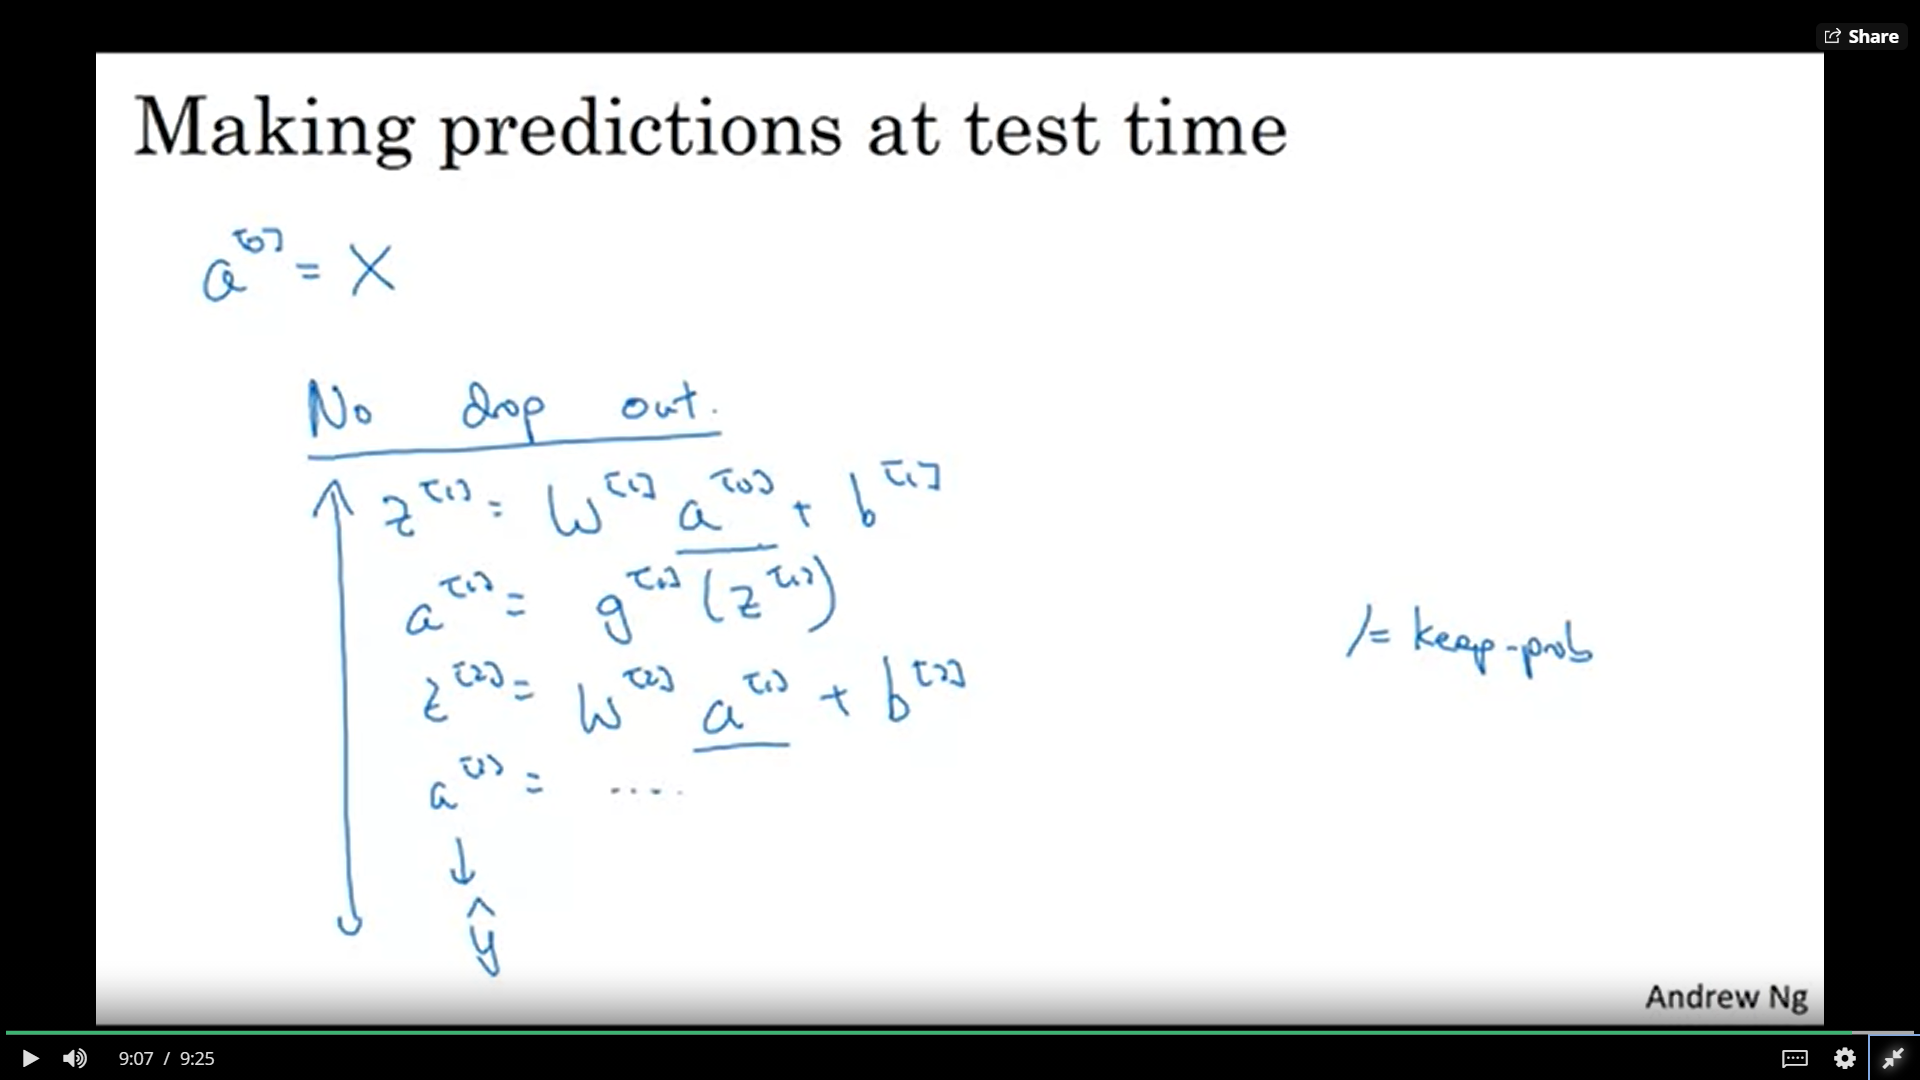

But notice that the test time you're not using dropout explicitly and you're not tossing coins at random, you're not flipping coins to decide which hidden units to eliminate. And that's because when you are making predictions at the test time, you don't really want your output to be random. If you are implementing dropout at test time, that just add noise to your predictions. In theory, one thing you could do is run a prediction process many times with different hidden units randomly dropped out and have it across them. But that's computationally inefficient and will give you roughly the same result; very, very similar results to this different procedure as well. And just to mention, the inverted dropout thing, you remember the step on the previous line when we divided by the keep_prob. The effect of that was to ensure that even when you don't see men dropout at test time to the scaling, the expected value of these activations don't change. So, you don't need to add in an extra funny scaling parameter at test time. 

# Understanding Dropout


So in computer vision, the input size is so big, inputting all these pixels that you almost never have enough data. And so drop out is very frequently used by computer vision. And there's some computer vision researchers that pretty much always use it, almost as a default. But really the thing to remember is that drop out is a regularization technique, it helps prevent over-fitting. And so, unless my algorithm is over-fitting, I wouldn't actually bother to use drop out. So it's used somewhat less often than other application areas. There's just with computer vision, you usually just don't have enough data, so you're almost always overfitting, which is why there tends to be some computer vision researchers who swear by drop out. 

#### Dropout is a Regularization Technique which helps to reduce Overfitting.

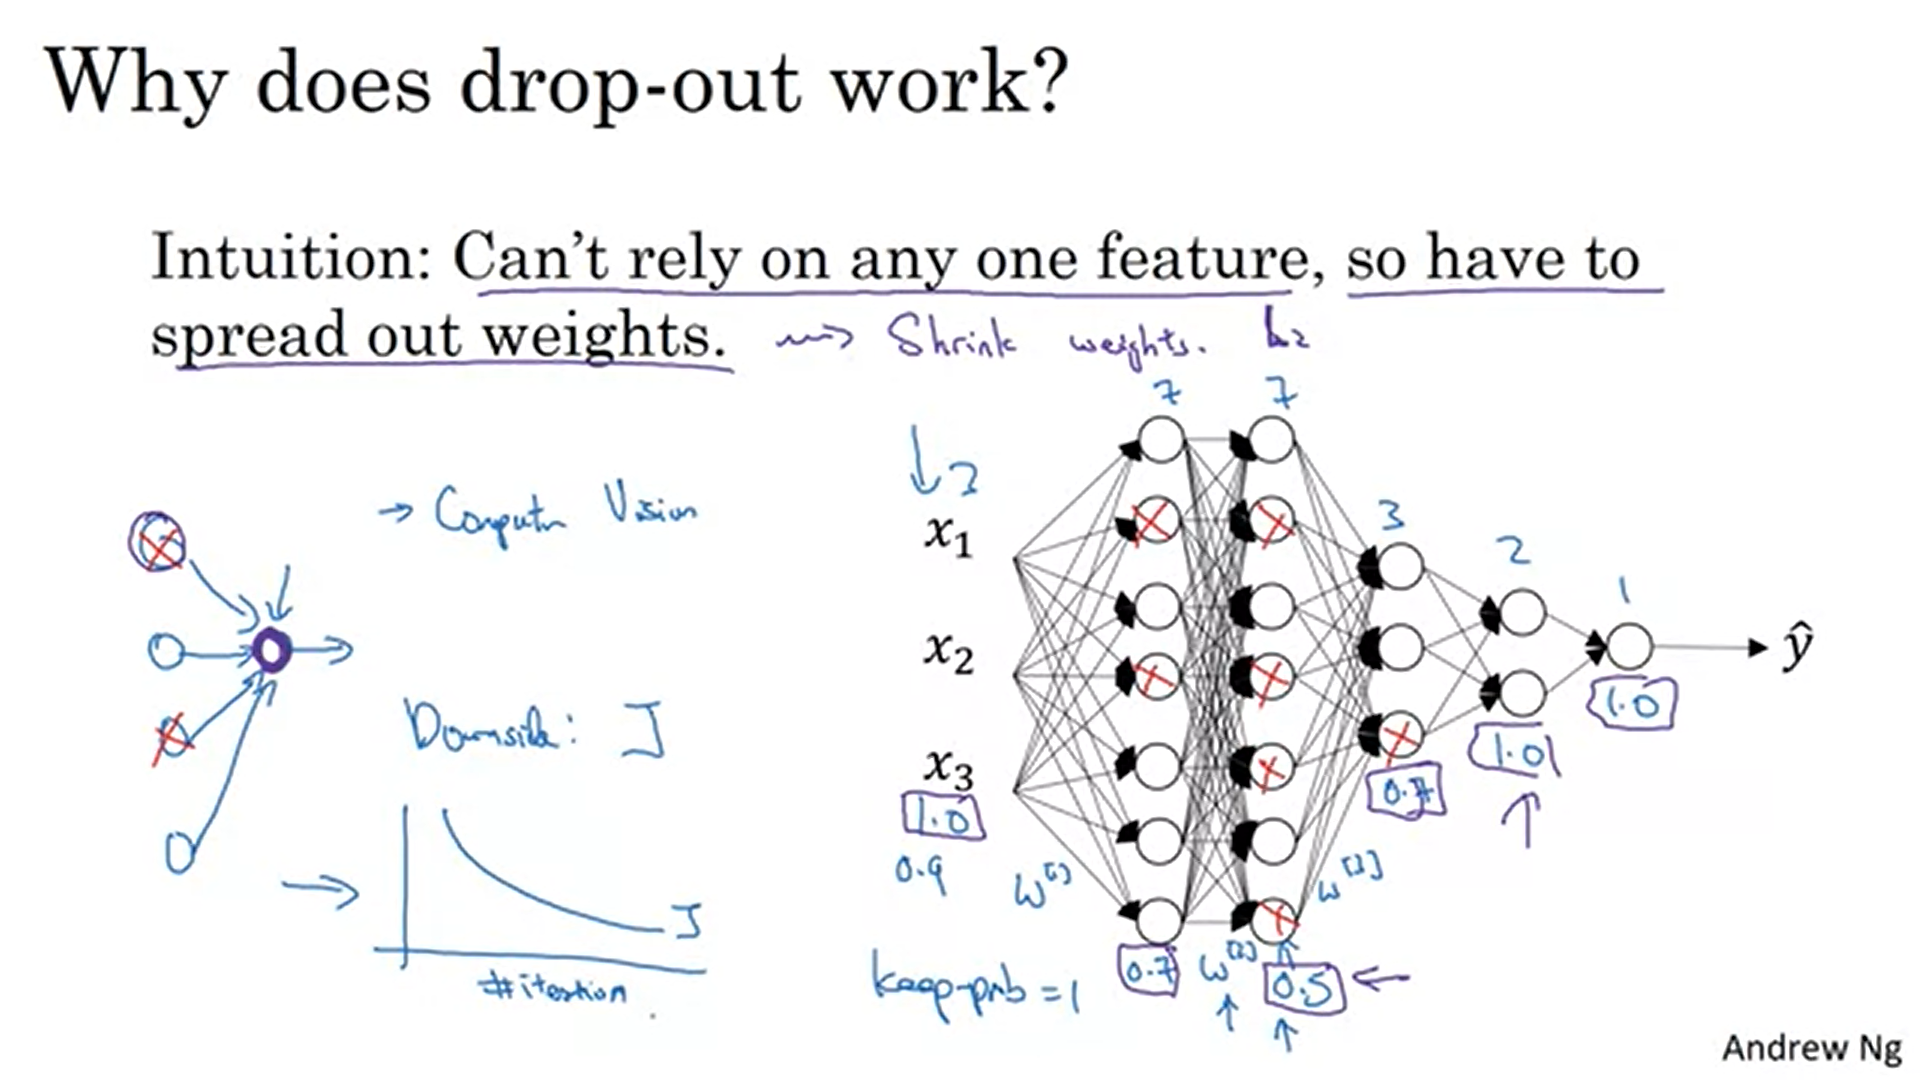

One big downside of drop out is that the cost function J is no longer well-defined. On every iteration, you are randomly killing off a bunch of nodes. And so, if you are double checking the performance of grade and dissent, it's actually harder to double check that you have a well defined cost function J that is going downhill on every iteration. Because the cost function J that you're optimizing is actually less. Less well defined, or is certainly hard to calculate. So you lose this debugging tool to will a plot, a graph like this. So what I usually do is turn off drop out, you will set key prop equals one, and I run my code and make sure that it is monotonically decreasing J, and then turn on drop out and hope that I didn't introduce bugs into my code during drop out. 

# Other regularization methods

In addition to L2 regularization and drop out regularization there are few other techniques to reducing over fitting in your neural network. Let's take a look. Let's say you fitting a CAD crossfire. If you are over fitting getting more training data can help, but getting more training data can be expensive and sometimes you just can't get more data. But what you can do is augment your training set by taking image like this. And for example, flipping it horizontally and adding that also with your training set. So now instead of just this one example in your training set, you can add this to your training example. So by flipping the images horizontally, you could double the size of your training set. Because you're training set is now a bit redundant this isn't as good as if you had collected an additional set of brand new independent examples. But you could do this Without needing to pay the expense of going out to take more pictures of cats. And then other than flipping horizontally, you can also take random crops of the image. So here we're rotated and sort of randomly zoom into the image and this still looks like a cat. So by taking random distortions and translations of the image you could augment your data set and make additional fake training examples.

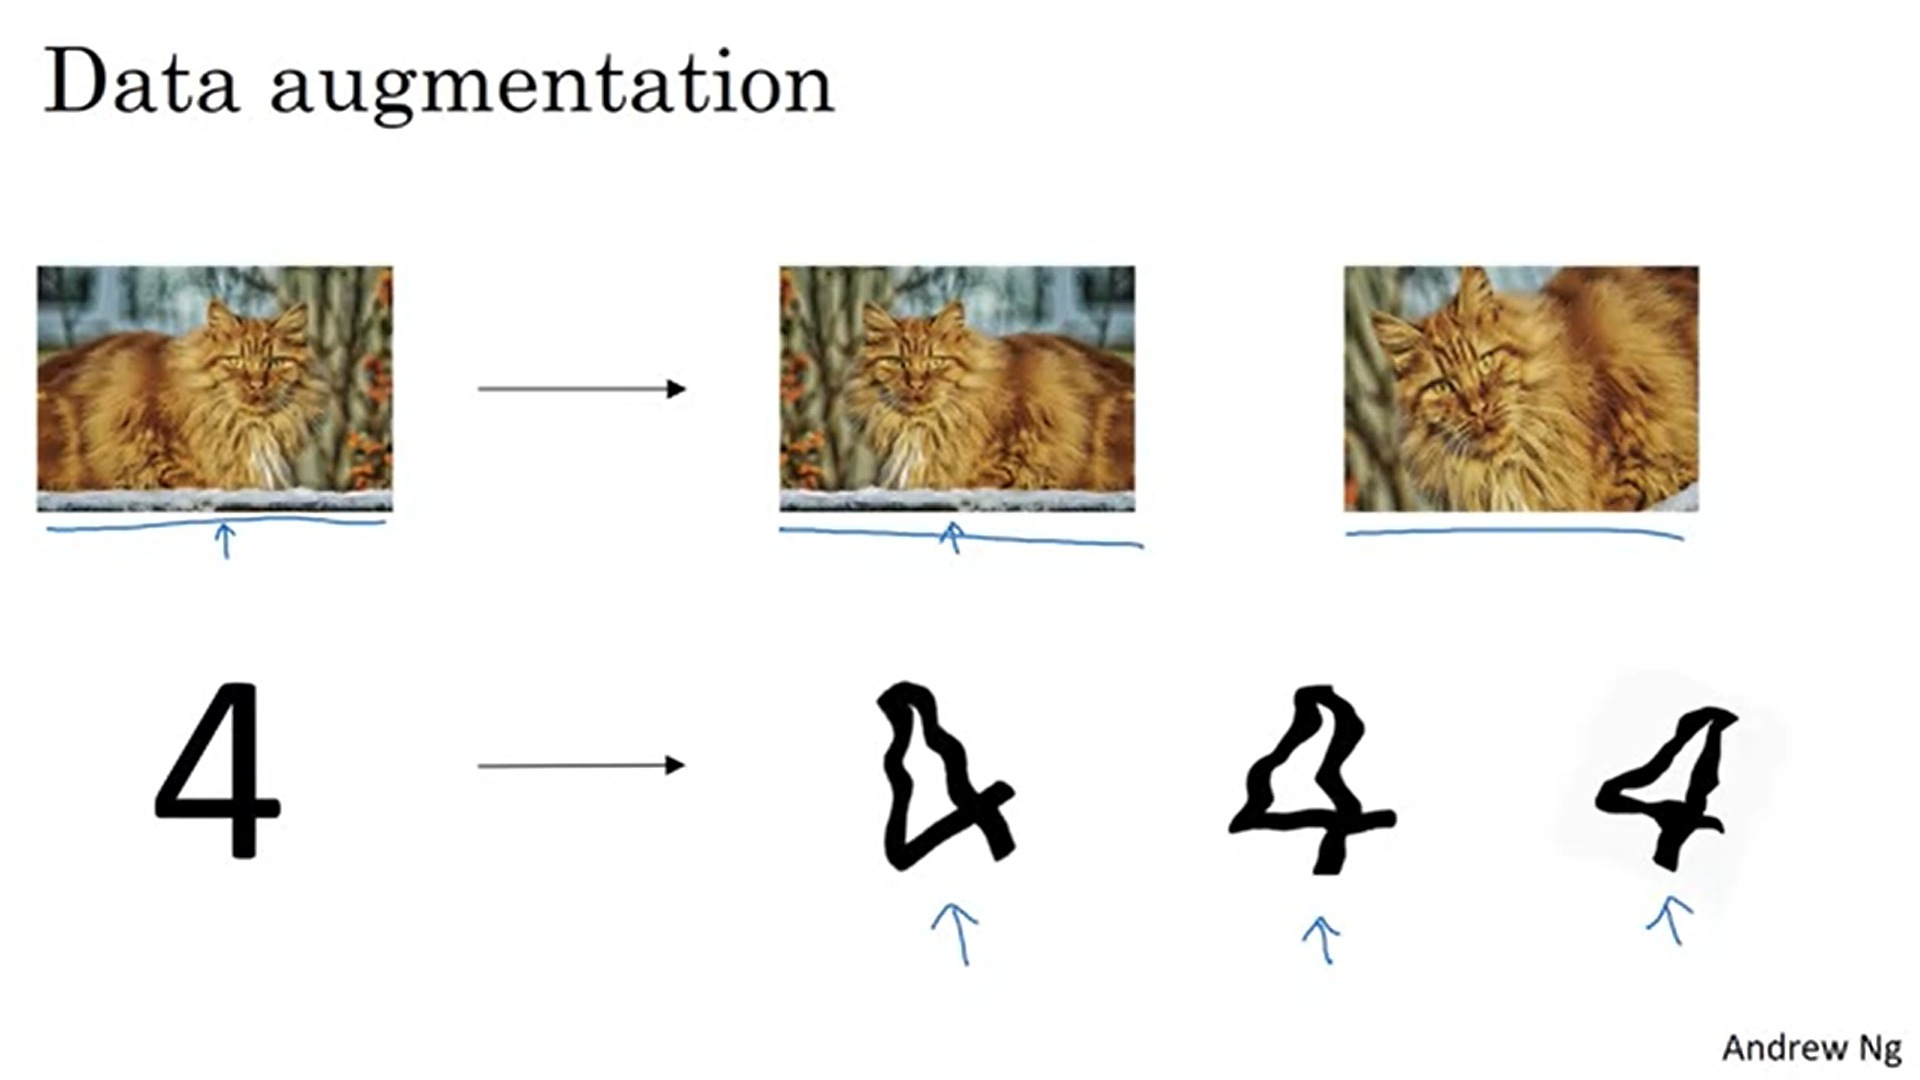

# Early stoping

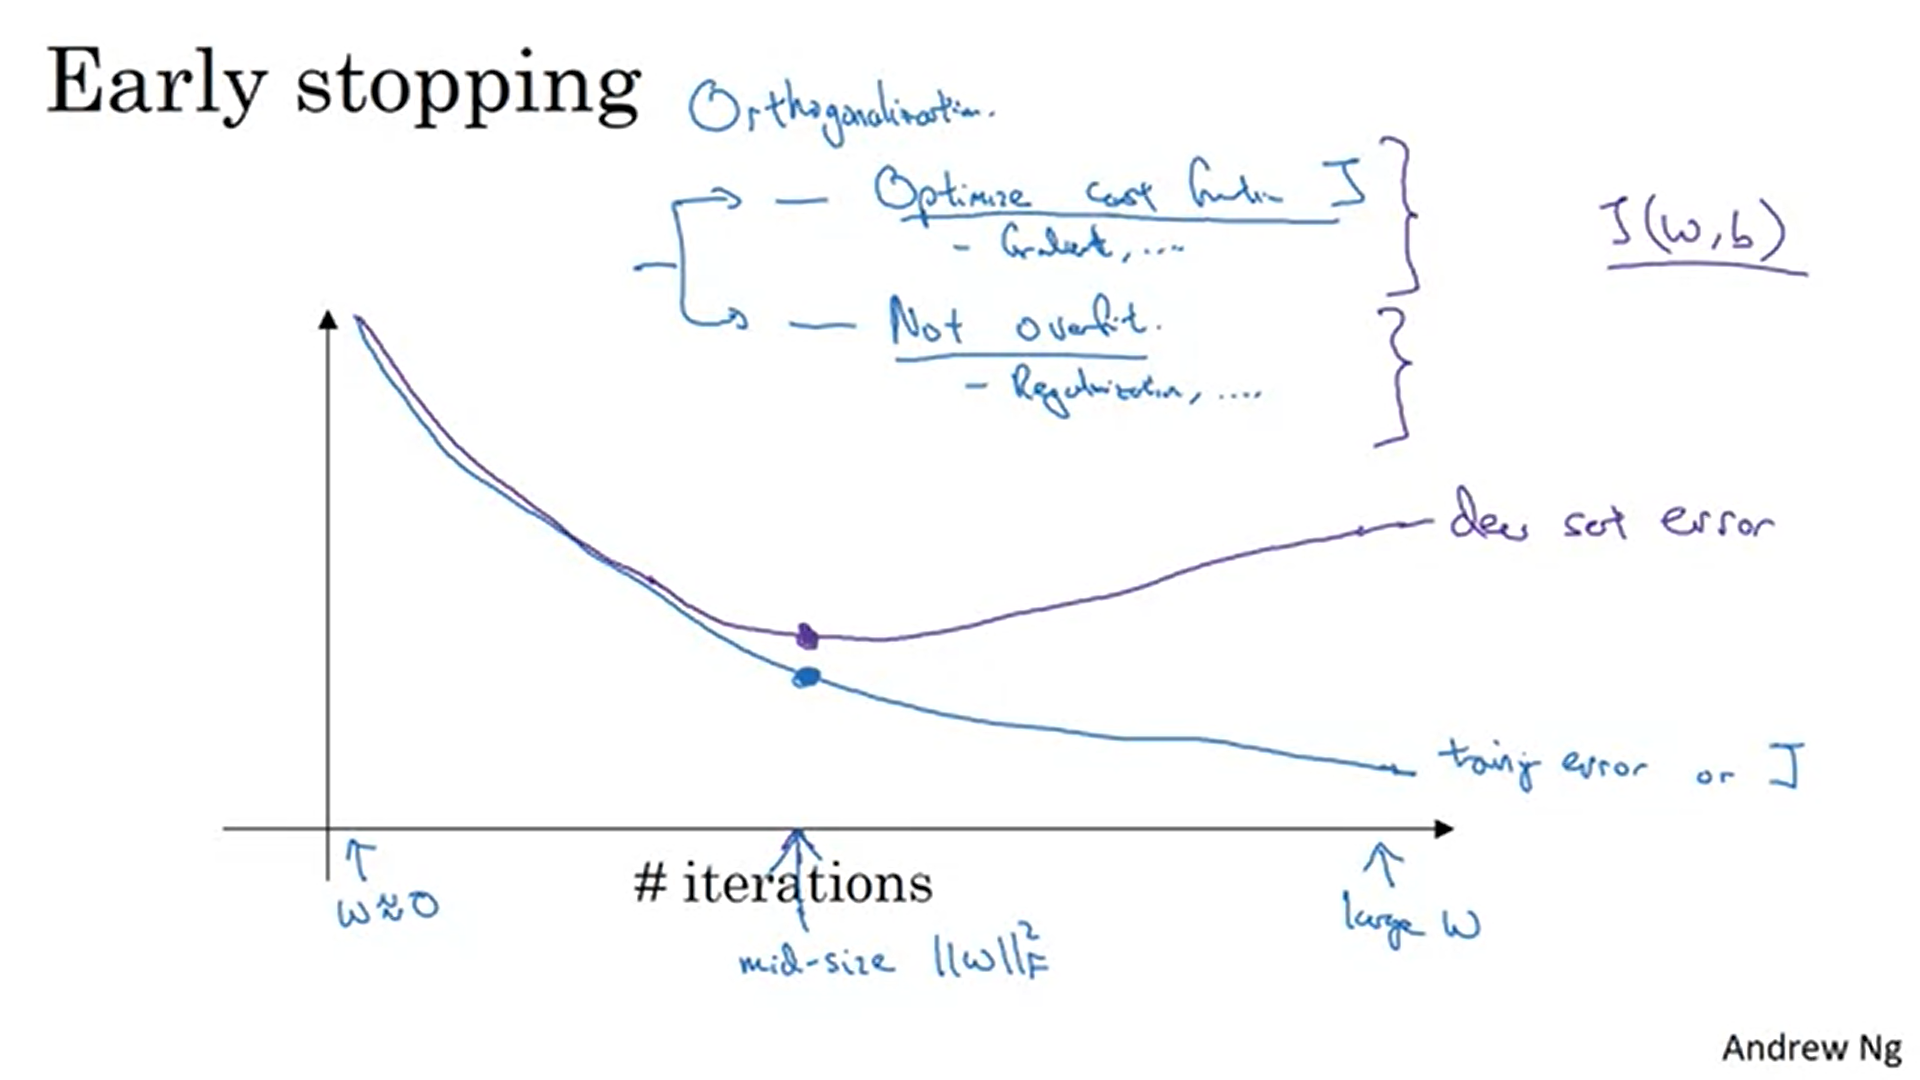

 So what early stopping does is, you will say well, it looks like your neural network was doing best around that iteration, so we just want to stop trading on your neural network halfway and take whatever value achieved this dev set error.

 I think of the machine learning process as comprising several different steps. One, is that you want an algorithm to optimize the cost function j and we have various tools to do that, such as grade intersect. And then we'll talk later about other algorithms, like momentum and RMS prop and Atom and so on. But after optimizing the cost function j, you also wanted to not over-fit. And we have some tools to do that such as your regularization, getting more data and so on. Now in machine learning, we already have so many hyper-parameters it surge over. It's already very complicated to choose among the space of possible algorithms. And so I find machine learning easier to think about when you have one set of tools for optimizing the cost function J, and when you're focusing on authorizing the cost function J. All you care about is finding w and b, so that J(w,b) is as small as possible. You just don't think about anything else other than reducing this. And then it's completely separate task to not over fit, in other words, to reduce variance. 

###### And this principle is sometimes called orthogonalization. And there's this idea, that you want to be able to think about one task at a time.

 Rather than using early stopping, one alternative is just use L2 regularization then you can just train the neural network as long as possible. I find that this makes the search space of hyper parameters easier to decompose, and easier to search over. But the downside of this though is that you might have to try a lot of values of the regularization parameter lambda. And so this makes searching over many values of lambda more computationally expensive. And the advantage of early stopping is that running the gradient descent process just once, you get to try out values of small w, mid-size w, and large w, without needing to try a lot of values of the L2 regularization hyperparameter lambda. If this concept doesn't completely make sense to you yet, don't worry about it. We're going to talk about orthogonalization in greater detail in a later video, I think this will make a bit more sense. Despite it's disadvantages, many people do use it. I personally prefer to just use L2 regularization and try different values of lambda. That's assuming you can afford the computation to do so. But early stopping does let you get a similar effect without needing to explicitly try lots of different values of lambda.